In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
articles_good = pd.read_csv("data/ainur/article_good.csv")
articles_nsgood = pd.read_csv("data/ainur/article_bad.csv")

In [166]:
type(articles_good)

pandas.core.frame.DataFrame

In [167]:
articles_good.head()

,Unnamed: 0,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


# Aspect 1: Total number of unique editors

### My Hypothesis: 

**Good** articles have more diverse numbers of unique editors than the **not-so-good** articles

In [168]:
pd.DataFrame(articles_good.groupby('Article').agg('user').unique()).head()

,user
Article,
4chan,"[Certes, 2600:8801:983:7000:21D4:4DD3:80E2:3E6..."
AACS encryption key controversy,"[2409:4062:209D:1376:A498:A3DA:38DA:55E9, Aoi,..."
AVG PC TuneUp,"[Certes, 2405:205:3202:4746:B8B7:A4C9:4E96:F74..."
Acid2,"[ClueBot NG, 190.43.57.117, 125.63.26.99, Just..."
Alan Kotok,"[Plaba123, 99.85.40.29, Certes, ClueBot NG, Ma..."


In [169]:
series_n_contributer = articles_good.groupby('Article').agg({'user': ['nunique']})
s_nsgood = articles_nsgood.groupby('Article').agg({'user': ['nunique']})

print('number of contributors description:\nGood\t|\tNot-So-Good')
pd.concat([series_n_contributer.describe(), s_nsgood.describe()], axis=1)

number of contributors description:
Good	|	Not-So-Good


user            
           nunique     nunique
count   152.000000  250.000000
mean    148.223684   93.548000
std     376.060623   26.368254
min       4.000000   67.000000
25%      13.000000   82.000000
50%      46.000000   90.000000
75%      99.000000   98.000000
max    2817.000000  385.000000

## Find outliners

### For Good Articles:

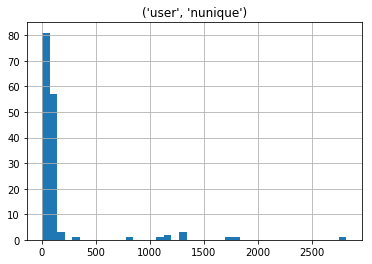

In [170]:
# Check the histogram first... if there's any suspcious stuff
_=series_n_contributer.hist(bins=40)

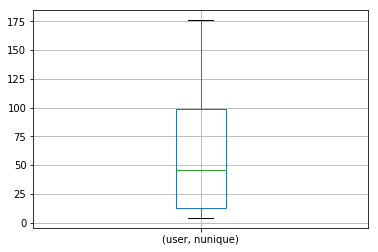

In [171]:
_=series_n_contributer.boxplot(showfliers=False)

By looking at the boxplot, we treat n_contributer over 175 as outliners:

In [172]:
task1_good = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
outliners = task1_good[ task1_good>175 ]
print(outliners)
outliners.describe()

# articles_good.groupby('Article').agg('user').describe()['unique'].sort_values()[::-1].head(15)

Article
4chan                                    1167
Acid2                                     779
Delrina                                  1294
Folding@home                             1332
Macintosh Classic                        1060
Manchester Baby                          2817
Manchester Mark 1                        1283
Microsoft Security Essentials            1197
NeXT                                     1727
Parallel computing                       1824
Polygon (website)                         176
Rise of Nations: Thrones and Patriots     291
Name: unique, dtype: object


count       12
unique      12
top       1167
freq         1
Name: unique, dtype: int64

### Let's compare with the not-so-good one

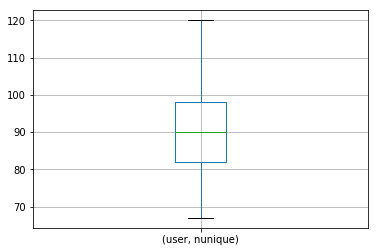

In [173]:
_=s_nsgood.boxplot(showfliers=False)

By looking at the boxplot, we treat n_contributer of not-so-good articles over 120 as outliners:

In [174]:
task1_nsgood = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])
outliners = task1_good[ task1_good>120 ]
print(outliners)
outliners.describe()

Article
4chan                                       1167
Acid2                                        779
Delrina                                     1294
Eugene Kaspersky                             139
Folding@home                                1332
Fortinet                                     144
Heartbleed                                   157
History of computing in the Soviet Union     161
ILoo                                         122
Integer sorting                              125
JMP (statistical software)                   128
Jeremy Stoppelman                            123
Macintosh Classic                           1060
Manchester Baby                             2817
Manchester Mark 1                           1283
Microsoft Security Essentials               1197
Mya (program)                                125
NeXT                                        1727
Nimrod (computing)                           135
Parallel computing                          1824
Paxata      

count      27
unique     25
top       125
freq        2
Name: unique, dtype: int64

## Compare the boxplots together

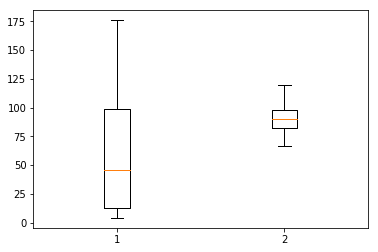

In [175]:
g = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
nsg = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])

_=plt.boxplot([g, nsg], showfliers=False)

## Conclution:

The comparison of boxplots across two groups concludes that my hypothesis that `Good articles have more diverse numbers of unique editors than the not-so-good articles` is valid.

# Aspect 2: Number of edits per editors

### My Hypothesis: 

**Good** articles have higher numbers of edits per editors than the **not-so-good** articles

    The editors comes back frequently to improve the articles and thus makes the article better.
    


## Edits per editor description:

In [176]:
task2_good = articles_good.groupby(['Article', 'user']).agg('rev_id').count()
task2_nsgood = articles_nsgood.groupby(['Article', 'user']).agg('rev_id').count()

print('Edits per editor description:\nGood\t|\tNot-So-Good')
pd.concat([task2_good.describe(), task2_nsgood.describe()], axis=1)

Edits per editor description:
Good	|	Not-So-Good


,rev_id,rev_id
count,22530.000000,23387.000000
mean,1.738304,1.807457
std,3.230359,1.980297
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,162.000000,44.000000


## Find outliners

###  • Good Group

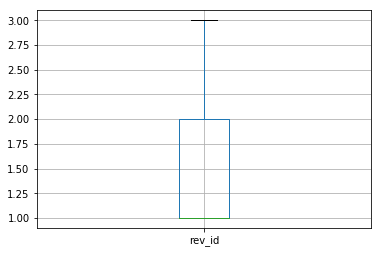

In [177]:
_=pd.DataFrame(task2_good).boxplot(showfliers=False)

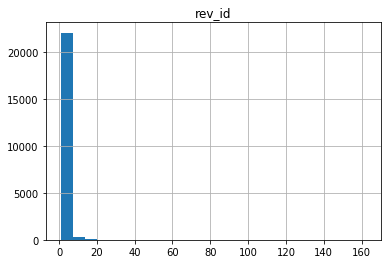

In [178]:
_=pd.DataFrame(task2_good).hist(bins=25)

By looking at the boxplot and the histogram, we treat counts of good articles over `3` as outliners:

In [179]:
outliners = task2_good[ task2_good>3 ]
print('Proportion of outliner', outliners.count() / task2_good.count())
outliners.describe()

Proportion of outliner 0.07043941411451399


count    1587.000000
mean        7.953371
std        10.130876
min         4.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       162.000000
Name: rev_id, dtype: float64

### • Not-So-Good Group

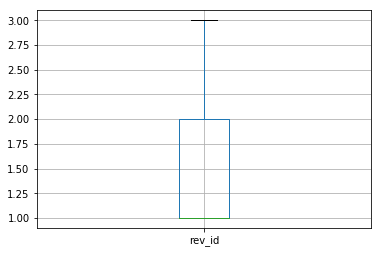

In [180]:
_=pd.DataFrame(task2_nsgood).boxplot(showfliers=False)

By looking at the boxplot and the histogram, we also treat counts of **not-so-good** articles over `3` as outliners:

In [181]:
outliners = task2_nsgood[ task2_nsgood>3 ]
print('Proportion of outliner:', outliners.count() / task2_nsgood.count())
outliners.describe()

Proportion of outliner: 0.08564587163808954


count    2003.00000
mean        7.05991
std         3.39542
min         4.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        44.00000
Name: rev_id, dtype: float64

## Compare the boxplots together

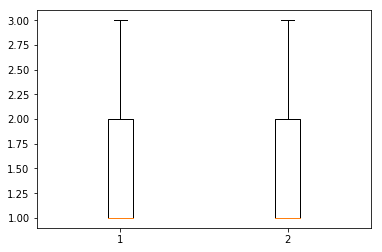

In [182]:
_=plt.boxplot([task2_good, task2_nsgood], showfliers=False)

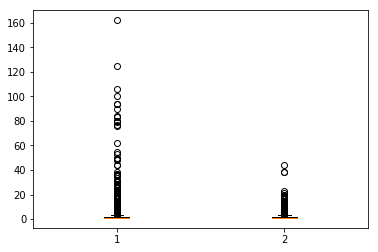

In [183]:
_=plt.boxplot([task2_good, task2_nsgood])

## Conclusions:

As [the data description of two the groups](#Edits-per-editor-description:) shows, 

 - The mean of the two is quite similar
 
 - The standard deviation of `Good` group is slightly larger than the `Not-so-good` group
 
By looking at the boxplots comparison, the two groups have the same distribution in majority (without taking outliners into consideration), but the `Good` group has a larger range of outliners.

My hypothesis of "`Good articles have higher numbers of edits per editors than the not-so-good articles`" can not be valid. The numbers of edits per editors shows no strong relation to the article qualities.

# Aspect 3: Number of talk-page posts

# Aspect 4: Number of editors posting on talk-pages

# Aspect 5: Frequency of edits (time between edits)

### My Hypothesis: 

**Good** articles have lower frequency of edits than the **not-so-good** articles

## Pre-processing of the timestamp data

In [184]:
task5_good = pd.DataFrame(articles_good.groupby('Article').agg('timestamp').unique())
task5_good_m = articles_good.groupby('Article').agg({'user': ['nunique']})
task5_good.head()

,timestamp
Article,
4chan,"[2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2..."
AACS encryption key controversy,"[2018-06-24T18:20:28Z, 2018-04-16T22:03:13Z, 2..."
AVG PC TuneUp,"[2017-11-10T11:47:34Z, 2017-11-10T10:01:50Z, 2..."
Acid2,"[2018-11-14T21:54:02Z, 2018-11-14T21:54:00Z, 2..."
Alan Kotok,"[2018-10-20T02:26:38Z, 2018-10-20T02:26:28Z, 2..."


In [185]:
one_article = task5_good.loc['4chan']
one_article.loc['timestamp']
time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
time_series = time_series.sort_values()
time_series.diff().mean()

Timedelta('2 days 20:06:20.697937')

In [186]:
for index, row in task5_good.iterrows():
    print(row)
    print(row.name)
    break

timestamp    [2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2...
Name: 4chan, dtype: object
4chan


In [187]:
def measure_freq(article_name, df):
    one_article = df.loc[article_name]
    one_article.loc['timestamp']
    time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
    time_series = time_series.sort_values()
    # time_series.diff().describe()
    return time_series.diff().astype('timedelta64[s]').mean()

In [188]:
task5_m1_good = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_good)} for index, row in task5_good.iterrows()])

task5_nsgood = pd.DataFrame(articles_nsgood.groupby('Article').agg('timestamp').unique())
task5_m1_nsgood = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_nsgood)} for index, row in task5_nsgood.iterrows()])

task5_m1_good.head()

,Article,mean_edit_timediff
0,4chan,2.451807e+05
1,AACS encryption key controversy,1.895115e+07
2,AVG PC TuneUp,6.864113e+06
3,Acid2,3.684713e+05
4,Alan Kotok,5.924646e+06


## Frequency of edits description:

In [189]:
print('Frequency of edits description (in second):\nGood\t|\tNot-So-Good')
pd.concat([task5_m1_good.describe(), task5_m1_nsgood.describe()], axis=1)

Frequency of edits description (in second):
Good	|	Not-So-Good


,mean_edit_timediff,mean_edit_timediff
count,1.520000e+02,2.500000e+02
mean,9.967647e+06,3.165624e+06
std,1.075210e+07,5.049724e+05
min,9.803746e+04,7.824103e+05
25%,2.856659e+06,2.915689e+06
50%,5.504580e+06,3.207897e+06
75%,1.443341e+07,3.446307e+06
max,4.889858e+07,4.441779e+06


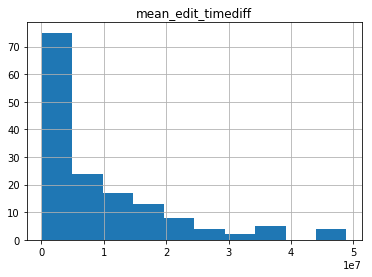

In [190]:
_=task5_m1_good.hist(column='mean_edit_timediff')

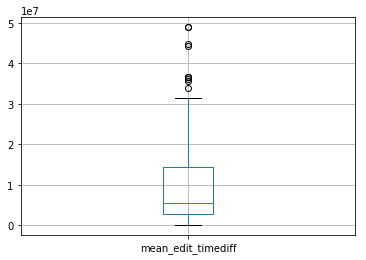

In [191]:
_=task5_m1_good.boxplot(column='mean_edit_timediff')

### Let's compare with the other group

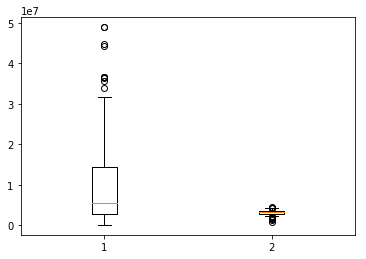

In [192]:
_=plt.boxplot([task5_m1_good['mean_edit_timediff'], task5_m1_nsgood['mean_edit_timediff']])